The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. 

They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

In [2]:
import pandas as pd
import pandasql as sql
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import norm
from scipy.stats import ttest_ind

Statistical Summary

In [3]:
#Read in and explore initial dataset
df = pd.read_csv('/Users/dave/Documents/Python/CSVs/walmart_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
#Trim data from stay in current city and convert to int64
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str[:1]
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')

In [5]:
#Look at statistical summary of the data
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,1.858418,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,1.289443,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,3.000000,1.000000,8.000000,12054.000000


Data Visualization for Single Series Data

Data Distribution for Numerical Features

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Axes: xlabel='Product_Category', ylabel='Count'>

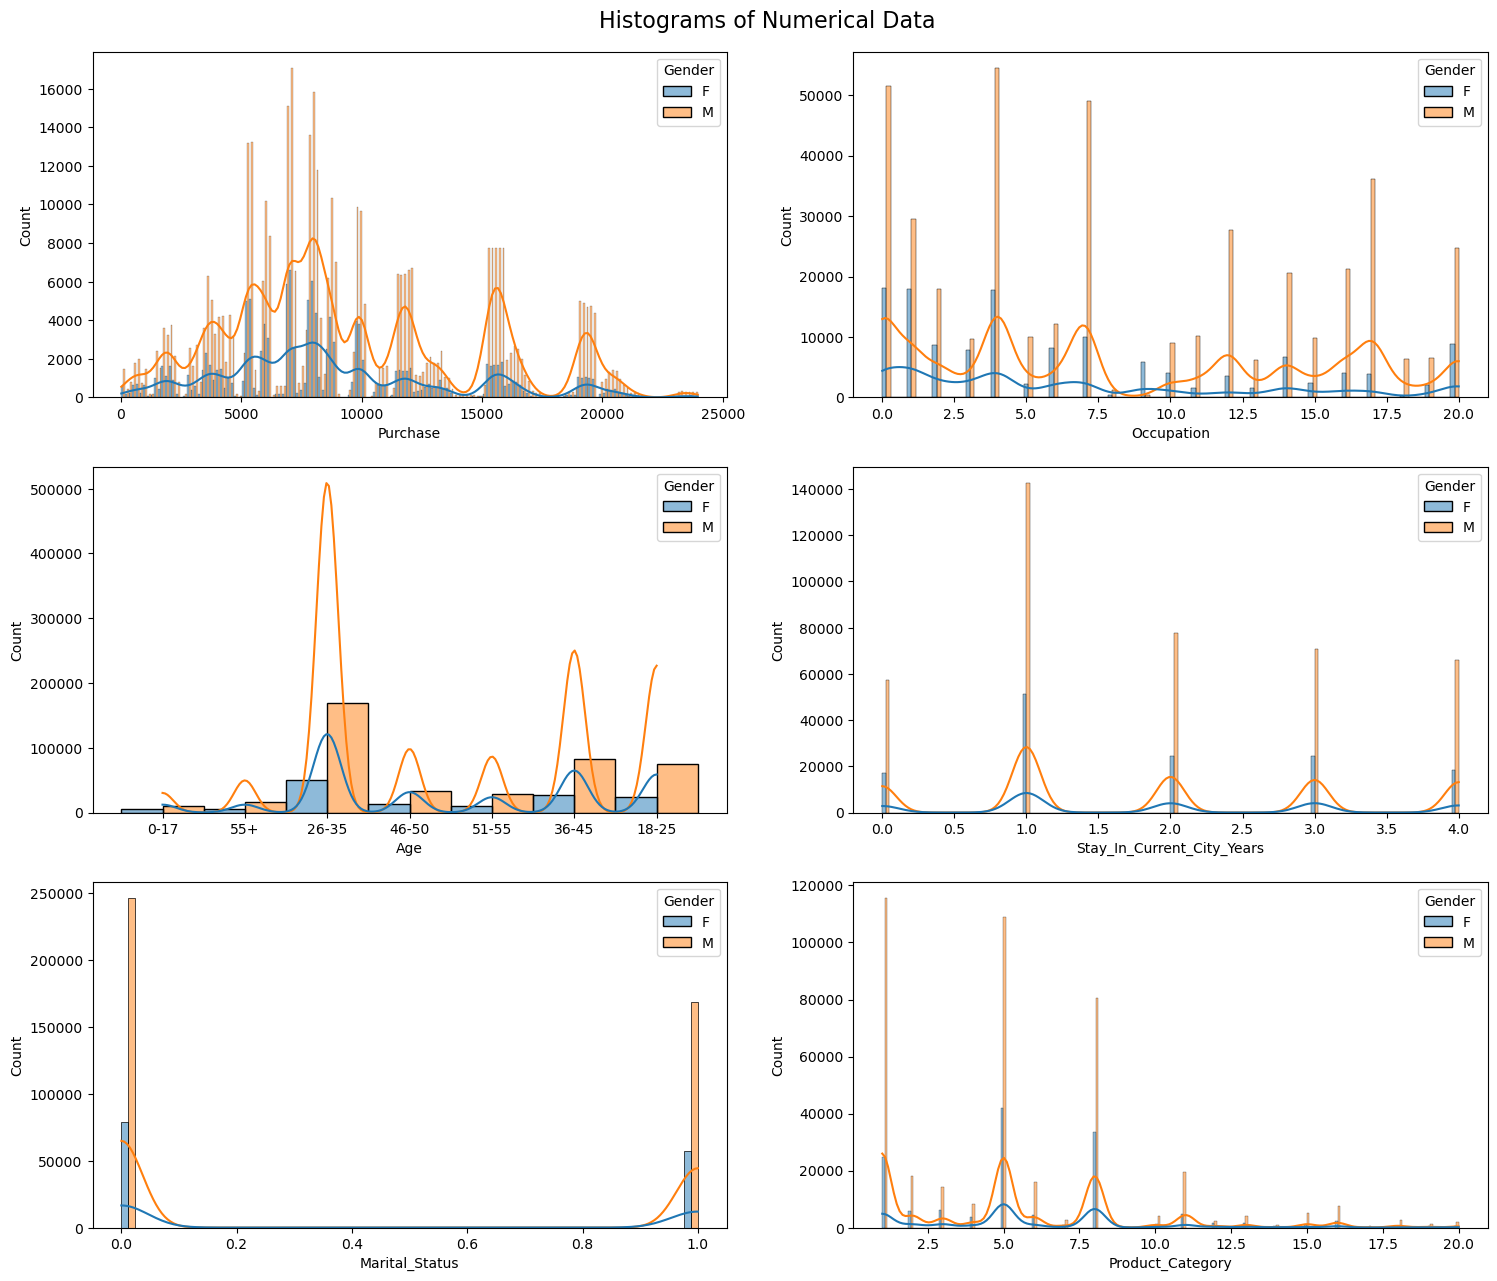

In [76]:
#Plot histograms to show distribution of each variable, split by gender

fig, ax = plt.subplots(3,2, figsize=(18,14))
fig.suptitle('Histograms of Numerical Data', fontsize=16)
fig.subplots_adjust(top=0.95)

sns.histplot(data=df,x='Purchase',hue='Gender',ax=ax[0,0], multiple='dodge', kde=True)
sns.histplot(data=df,x='Occupation',hue='Gender',ax=ax[0,1], multiple='dodge', kde=True)
sns.histplot(data=df,x='Age',hue='Gender',ax=ax[1,0], multiple='dodge', kde=True)
sns.histplot(data=df,x='Stay_In_Current_City_Years',hue='Gender',ax=ax[1,1], multiple='dodge', kde=True)
sns.histplot(data=df,x='Marital_Status',hue='Gender',ax=ax[2,0], multiple='dodge', kde=True)
sns.histplot(data=df,x='Product_Category',hue='Gender',ax=ax[2,1], multiple='dodge', kde=True)

Data Visualization for Categorical Features

<Axes: xlabel='Gender', ylabel='Product_Category'>

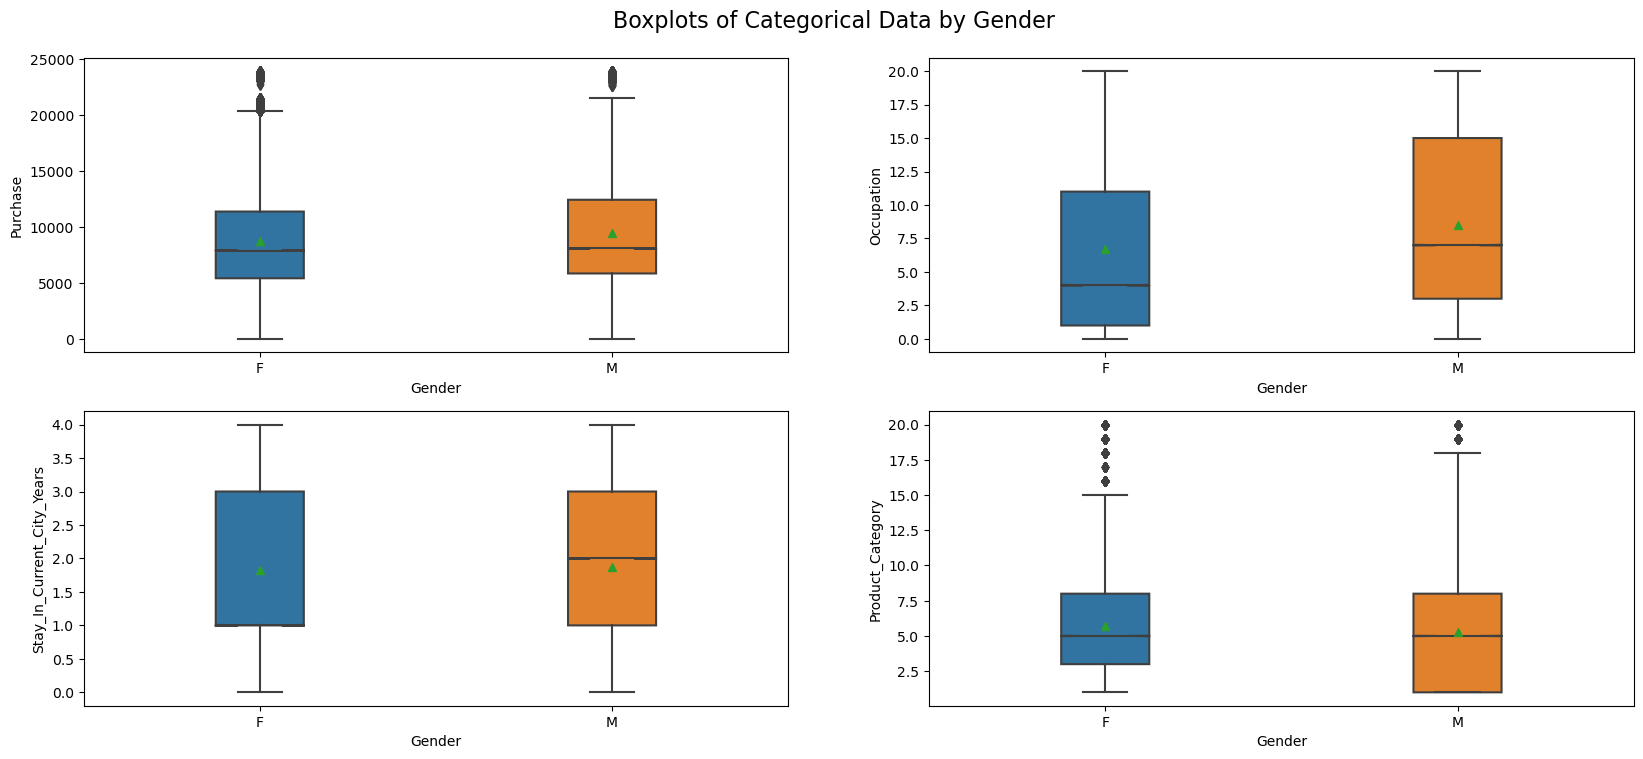

In [54]:
#Create boxplots to show distribution by Gender
fig,ax = plt.subplots(2,2,figsize=(20,8))
fig.suptitle('Boxplots of Categorical Data by Gender', fontsize=16)
fig.subplots_adjust(top=0.92)

sns.boxplot(data=df, y='Purchase', x='Gender', ax=ax[0,0], notch=True, showmeans=True, width=0.25)
sns.boxplot(data=df, y='Occupation', x='Gender', ax=ax[0,1], notch=True, showmeans=True, width=0.25)
sns.boxplot(data=df, y='Stay_In_Current_City_Years', x='Gender', ax=ax[1,0], notch=True, showmeans=True, width=0.25)
sns.boxplot(data=df, y='Product_Category', x='Gender', ax=ax[1,1], notch=True, showmeans=True, width=0.25)


<Axes: xlabel='Product_Category', ylabel='Purchase'>

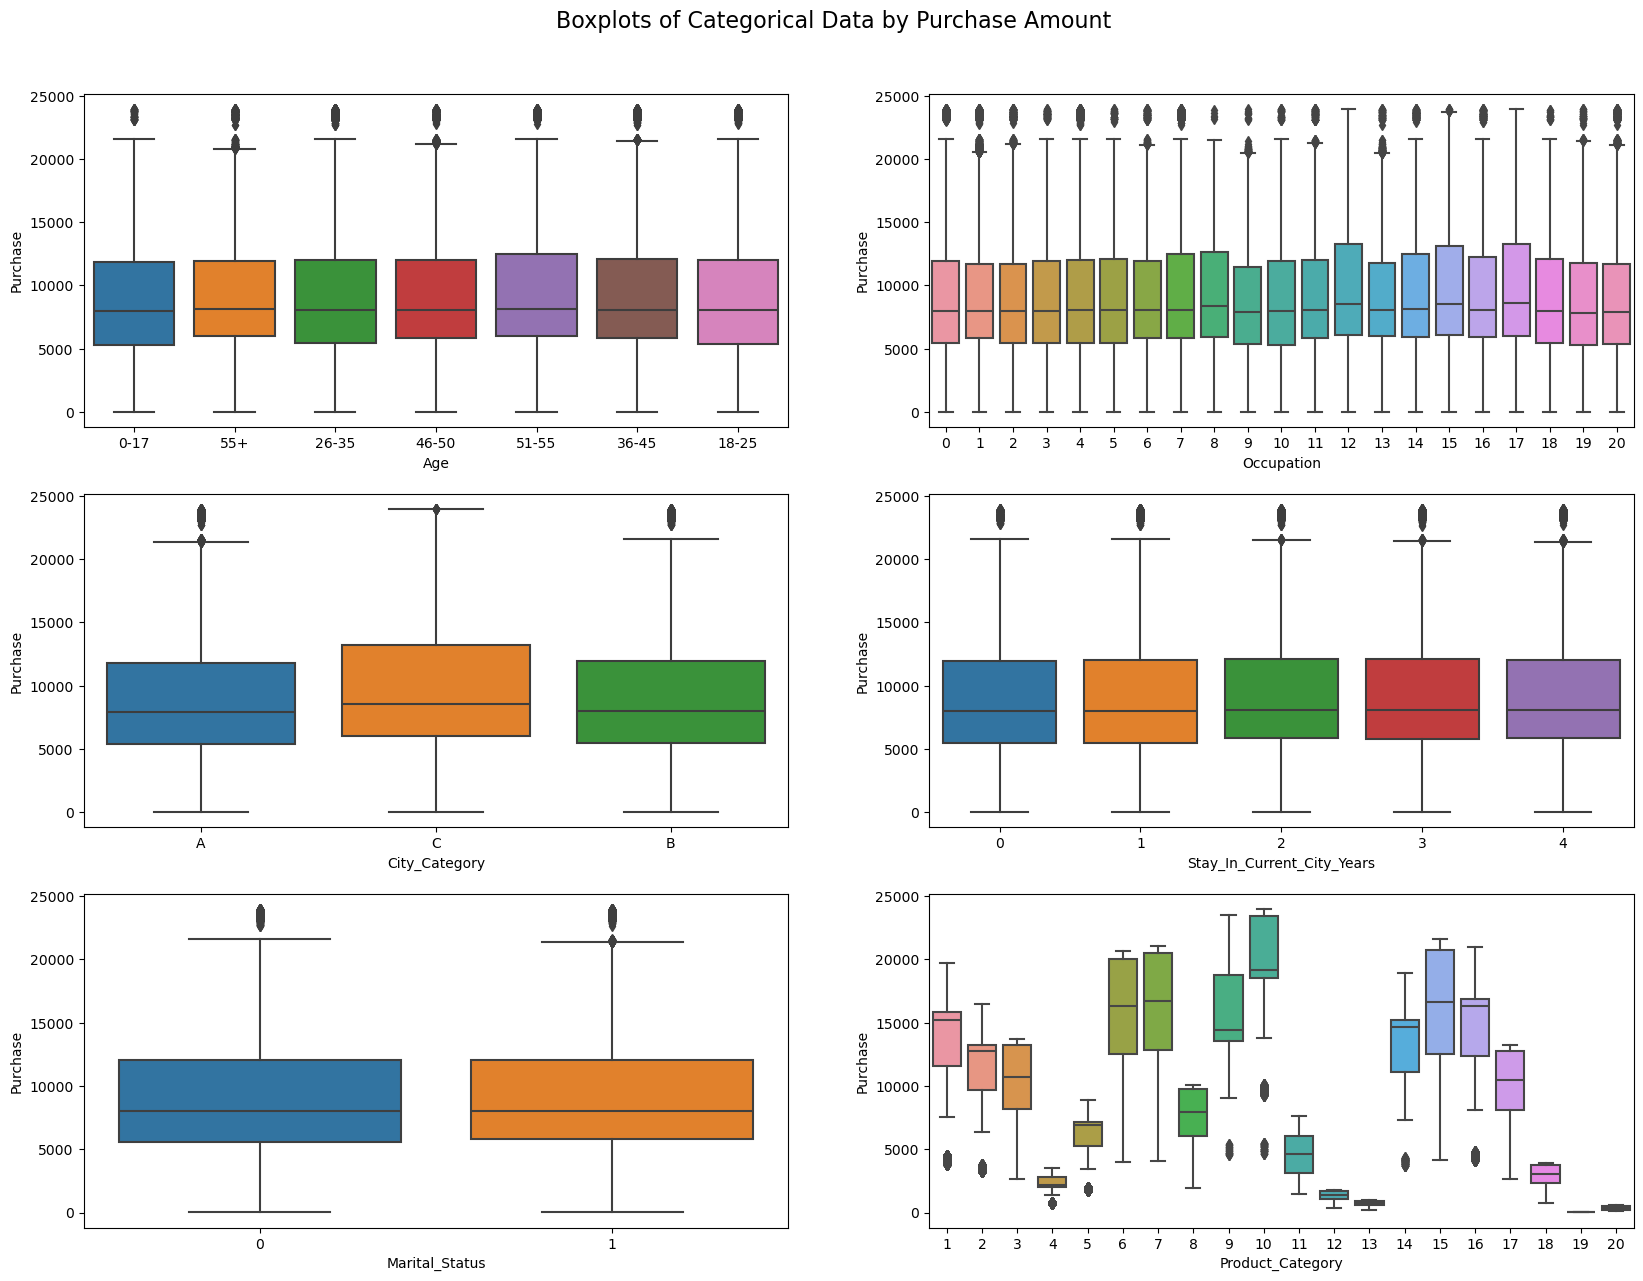

In [53]:
#Create boxplots to show distribution by purchase amount

fig,ax = plt.subplots(3,2,figsize=(20,14))
fig.suptitle('Boxplots of Categorical Data by Purchase Amount', fontsize=16)
fig.subplots_adjust(top=0.92)

sns.boxplot(data=df, y='Purchase', x='Age', ax=ax[0,0])
sns.boxplot(data=df, y='Purchase', x='Occupation', ax=ax[0,1])
sns.boxplot(data=df, y='Purchase', x='City_Category', ax=ax[1,0])
sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years', ax=ax[1,1])
sns.boxplot(data=df, y='Purchase', x='Marital_Status', ax=ax[2,0])
sns.boxplot(data=df, y='Purchase', x='Product_Category', ax=ax[2,1])

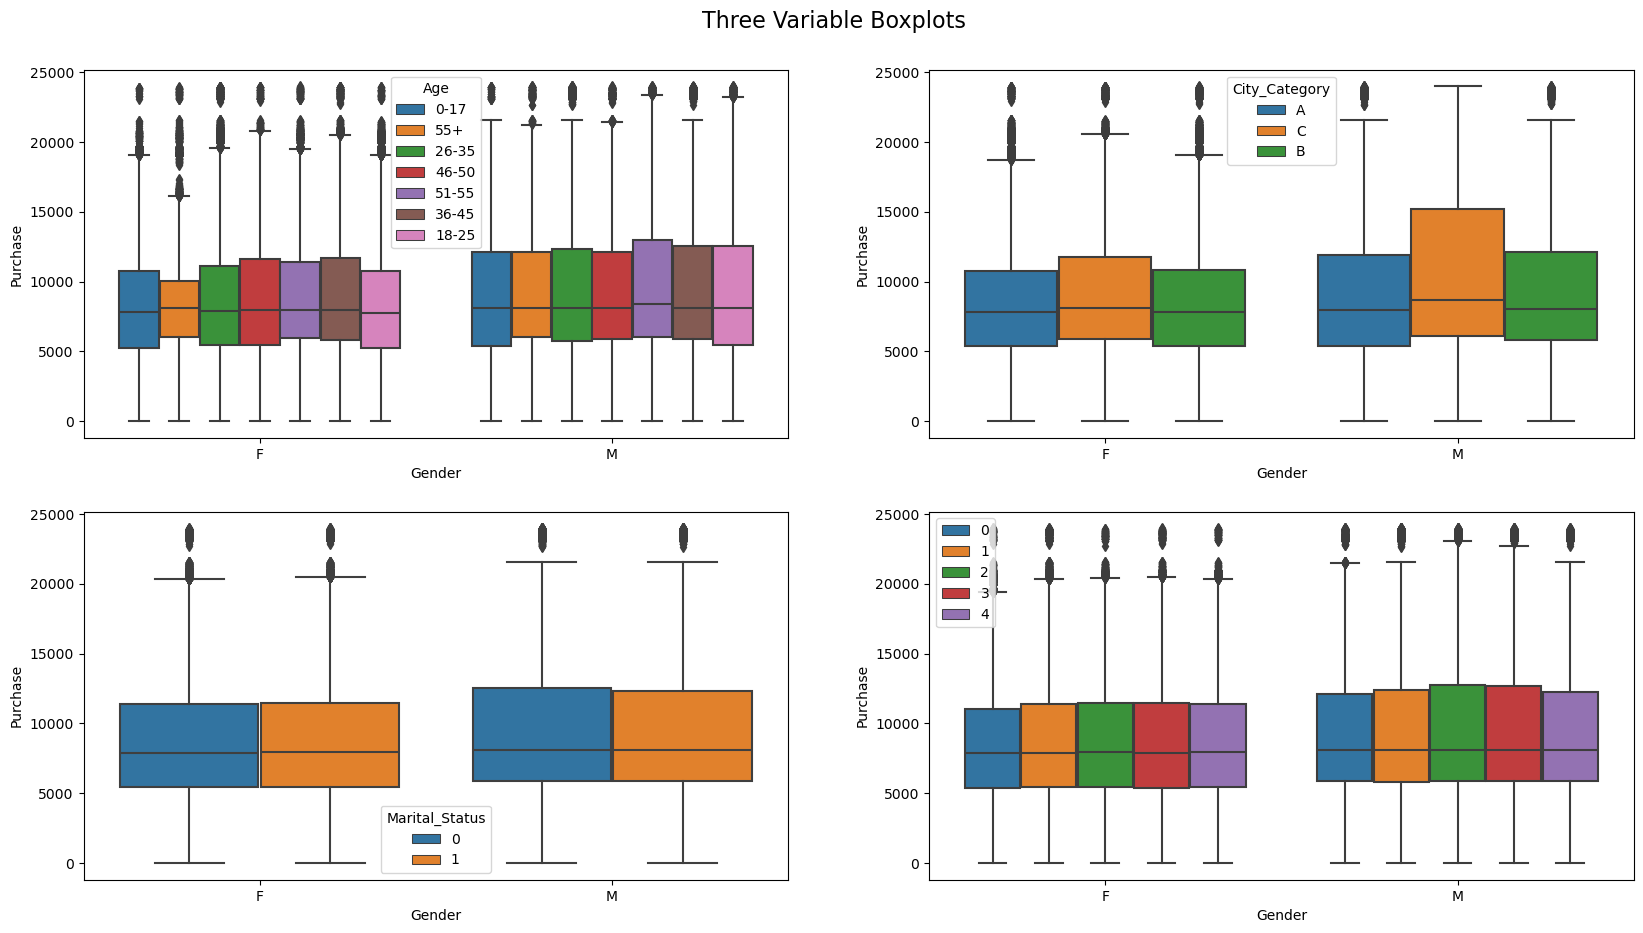

In [59]:
#Generate 3 variable boxplots to show impact of categorical data on both gender and purchase

fig,ax = plt.subplots(2,2,figsize=(20,10))
fig.suptitle('Three Variable Boxplots', fontsize=16)
fig.subplots_adjust(top=0.92)

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', ax=ax[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', ax=ax[0,1])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', ax=ax[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=ax[1,1])
ax[1,1].legend(loc='upper left')

Data Analysis

In [49]:
#Calculate mean, standard deviation, sum and counts for purchase data
mean_df = df.groupby('Gender')['Purchase'].mean()
sum_df = df.groupby('Gender')['Purchase'].sum()
std_df = df.groupby('Gender')['Purchase'].std()
count_df = df.groupby('Gender')['Purchase'].count()

print('Average Purchase Amount by Gender: \n', mean_df, '\n')
print('Total Purchase Amount by Gender: \n', sum_df, '\n')
print('Standard Deviation by Gender \n', std_df, '\n')
print('Purchase Count by Gender \n', count_df, '\n')

Average Purchase Amount by Gender: 
 Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64 

Total Purchase Amount by Gender: 
 Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64 

Standard Deviation by Gender 
 Gender
F    4767.233289
M    5092.186210
Name: Purchase, dtype: float64 

Purchase Count by Gender 
 Gender
F    135809
M    414259
Name: Purchase, dtype: int64 



In [25]:
#Perform a t-test to determine statistical significance 
t_stat, p_value = ttest_ind(df[df['Gender'] == 'F']['Purchase'], df[df['Gender'] == 'M']['Purchase'])

print("T-statistic: ", t_stat)
print("P-value: ", p_value)

T-statistic:  -44.837957934353966
P-value:  0.0


<Axes: >

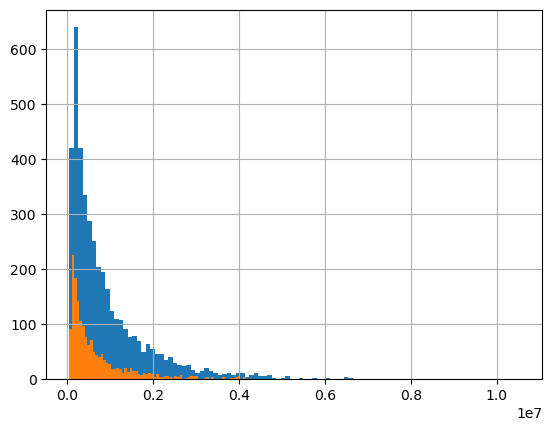

In [36]:
#Calculate average purchase amounts by gender and transaction, plot histogram to compare
mean_df = df.groupby(['User_ID','Gender'])['Purchase'].sum()
mean_df = mean_df.reset_index()
mean_df[mean_df['Gender']=='M']['Purchase'].hist(bins=100)
mean_df[mean_df['Gender']=='F']['Purchase'].hist(bins=100)